In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
df.loc[df['target'] == 0, 'target']='setosa'
df.loc[df['target'] == 1, 'target']='versicolor'
df.loc[df['target'] == 2, 'target']='virginica'

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

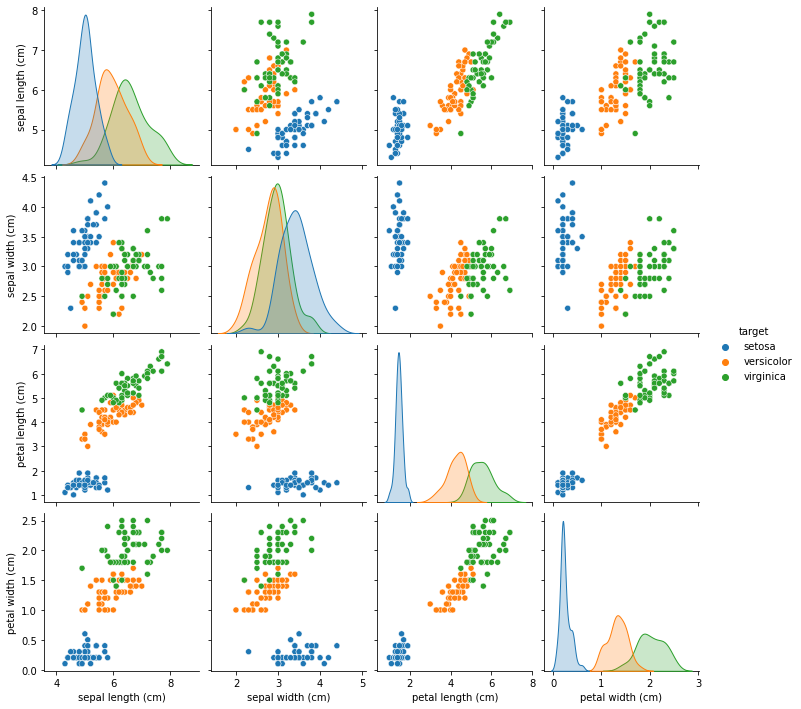

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [ ]:
X=iris.data
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(verbose=2, random_state=0)

In [ ]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(random_state=0, verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9555555555555556


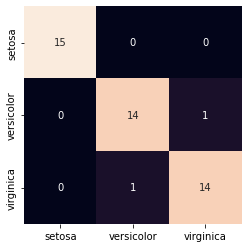

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=iris.target_names, columns=iris.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')

In [ ]:
X=iris.data
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#Set the parameters range

tuned_parameters=[{'kernel':['rbf'], 'gamma':[1e-3, 1e-4], 'C':[1, 10, 100, 1000]},
                  {'kernel':['linear'], 'C':[1, 10, 100, 1000]},
                  {'kernel':['poly'], 'degree':[1, 2, 3], 'C':[1, 10, 100, 1000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(SVC(), tuned_parameters, refit=True, cv=3, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/3] END ......C=1, gamma=0.001, kernel=rbf;, score=0.314 total time=   0.0s
[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.314 total time=   0.0s
[CV 2/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.314 total time=   0.0s
[CV 3/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.314 total time=   0.0s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.971 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/3] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.571 total time=   0.0s
[CV 3/3] END ....C=10, gamma=0.0001, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3],
                          'kernel': ['poly']}],
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=grid.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9777777777777777


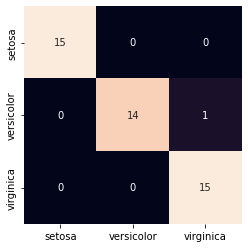

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=iris.target_names, columns=iris.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')